# Step 2 - Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/amit/Documents/Primere Project hamoye/Data/dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.shape

(373, 15)

For __Feature Engineering__ the __Train data__ should only be taken into consideration for the statistics value and 

then these values will be then used for both train and test. This is the best and optimal way to prevent the 

overfitting later in Model Building part.

In [4]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop('CDR' , axis=1) , df['CDR'] , test_size=0.2 , 
                                                      random_state=2)

In [5]:
X_train.shape , X_test.shape

((298, 14), (75, 14))

### 1) Missing Value Imputation
- by Median Imputation method

In [6]:
missing_variables = [feature for feature in df.columns if df[feature].isnull().sum()>0]
X_train[missing_variables].isnull().mean()

SES     0.053691
MMSE    0.006711
dtype: float64

So SES has 5% of missing values and MMSE has .05% of missign values

In [7]:
median_SES = X_train['SES'].median()
X_train['SES_imputed'] = X_train['SES'].fillna(median_SES)
X_test['SES_imputed'] = X_test['SES'].fillna(median_SES)

In [8]:
median_MMSE = df['MMSE'].median()
X_train['MMSE_imputed'] = df['MMSE'].fillna(median_MMSE)
X_test['MMSE_imputed'] = X_test['MMSE'].fillna(median_SES)

2 New variables Created for the analysis and it later will be removed

In [9]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,SES_imputed,MMSE_imputed
225,OAS2_0106,OAS2_0106_MR1,Demented,1,0,F,R,70,11,4.0,22.0,1445,0.722,1.214,4.0,22.0
100,OAS2_0048,OAS2_0048_MR4,Demented,4,970,M,R,68,16,1.0,7.0,1714,0.682,1.024,1.0,7.0
270,OAS2_0129,OAS2_0129_MR3,Nondemented,3,1591,F,R,82,18,1.0,29.0,1442,0.644,1.217,1.0,29.0
108,OAS2_0051,OAS2_0051_MR2,Nondemented,2,457,F,R,94,23,1.0,29.0,1474,0.696,1.190,1.0,29.0
344,OAS2_0175,OAS2_0175_MR2,Demented,2,700,M,R,72,16,4.0,28.0,1796,0.732,0.977,4.0,28.0


In [10]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,SES_imputed,MMSE_imputed
173,OAS2_0079,OAS2_0079_MR3,Demented,3,1435,F,R,73,12,4.0,16.0,1478,0.696,1.188,4.0,16.0
205,OAS2_0098,OAS2_0098_MR1,Demented,1,0,M,R,66,12,4.0,30.0,1446,0.780,1.214,4.0,30.0
70,OAS2_0036,OAS2_0036_MR4,Nondemented,4,1770,F,R,73,13,4.0,30.0,1360,0.773,1.291,4.0,30.0
118,OAS2_0056,OAS2_0056_MR1,Nondemented,1,0,F,R,71,14,2.0,28.0,1461,0.756,1.202,2.0,28.0
32,OAS2_0017,OAS2_0017_MR5,Nondemented,5,2400,M,R,86,12,3.0,27.0,1813,0.761,0.968,3.0,27.0


__Cheking out the distribution after imputation__

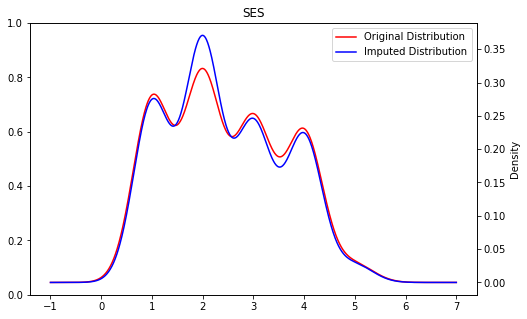

In [11]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['SES'].plot.density(color='red' , label='Original Distribution')

X_train['SES_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('SES')
plt.show()

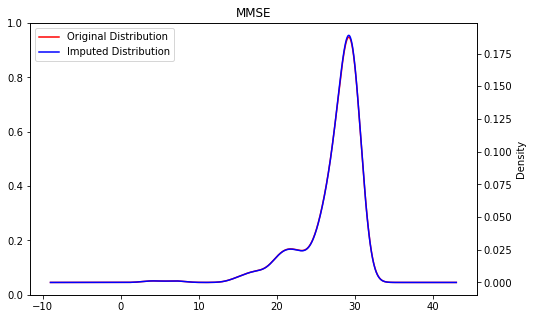

In [12]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['MMSE'].plot.density(color='red' , label='Original Distribution')

X_train['MMSE_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('MMSE')
plt.show()

We can see the there is the distortion of the original varible distribution in Variable `SSE` as the missing data is 5%.

But not in the `MMSE` variable

__Variance__

In [13]:
X_train['SES'].var() , X_train['SES_imputed'].var()  
# so we can also see the change in the variance

(1.3312132455011232, 1.2703319548957133)

In [14]:
X_train['MMSE'].var() , X_train['MMSE_imputed'].var()  
# almost same 

(14.179374713696745, 14.104772557792693)

__Covariance__

In [15]:
X_train.cov()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,SES_imputed,MMSE_imputed
Visit,0.811968,515.336271,0.886358,0.087678,-0.042503,-0.104776,20.697015,-0.003238,-0.017401,-0.041828,-0.096604
MR Delay,515.336271,395815.868676,730.822102,97.291427,-3.478181,188.181688,15685.625201,-1.388775,-13.121528,-1.712336,189.603518
Age,0.886358,730.822102,56.575565,-1.316939,-0.309508,1.980039,28.469550,-0.136960,-0.015140,-0.284094,1.952851
EDUC,0.087678,97.291427,-1.316939,8.409565,-2.435173,1.883406,143.208912,-0.001161,-0.106553,-2.259191,1.840339
SES,-0.042503,-3.478181,-0.309508,-2.435173,1.331213,-0.571969,-54.256076,0.003587,0.041696,1.331213,-0.571969
MMSE,-0.104776,188.181688,1.980039,1.883406,-0.571969,14.179375,-12.680486,0.050360,0.014042,-0.516285,14.179375
eTIV,20.697015,15685.625201,28.469550,143.208912,-54.256076,-12.680486,30800.405215,-1.176455,-23.828714,-49.979775,-16.410684
nWBV,-0.003238,-1.388775,-0.136960,-0.001161,0.003587,0.050360,-1.176455,0.001368,0.000923,0.003550,0.050113
ASF,-0.017401,-13.121528,-0.015140,-0.106553,0.041696,0.014042,-23.828714,0.000923,0.018866,0.038284,0.017635
SES_imputed,-0.041828,-1.712336,-0.284094,-2.259191,1.331213,-0.516285,-49.979775,0.003550,0.038284,1.270332,-0.517999


We can see that Variable covariance is also changed for the `SES` variable but for the `MMSE` is almost same there is no change

So after all the inferences derived after the imputation . We come to a conclusion to make the additional missing indicator for the variable `SES`

In [16]:
# 1 for missing and 0 for not missing

X_train['missing_indicator_SES'] = np.where(X_train['SES'].isnull() , 1 , 0)  
X_test['missing_indicator_SES'] = np.where(X_test['SES'].isnull() , 1 , 0)

In [17]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,SES_imputed,MMSE_imputed,missing_indicator_SES
225,OAS2_0106,OAS2_0106_MR1,Demented,1,0,F,R,70,11,4.0,22.0,1445,0.722,1.214,4.0,22.0,0
100,OAS2_0048,OAS2_0048_MR4,Demented,4,970,M,R,68,16,1.0,7.0,1714,0.682,1.024,1.0,7.0,0
270,OAS2_0129,OAS2_0129_MR3,Nondemented,3,1591,F,R,82,18,1.0,29.0,1442,0.644,1.217,1.0,29.0,0
108,OAS2_0051,OAS2_0051_MR2,Nondemented,2,457,F,R,94,23,1.0,29.0,1474,0.696,1.190,1.0,29.0,0
344,OAS2_0175,OAS2_0175_MR2,Demented,2,700,M,R,72,16,4.0,28.0,1796,0.732,0.977,4.0,28.0,0


In [18]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,SES_imputed,MMSE_imputed,missing_indicator_SES
173,OAS2_0079,OAS2_0079_MR3,Demented,3,1435,F,R,73,12,4.0,16.0,1478,0.696,1.188,4.0,16.0,0
205,OAS2_0098,OAS2_0098_MR1,Demented,1,0,M,R,66,12,4.0,30.0,1446,0.780,1.214,4.0,30.0,0
70,OAS2_0036,OAS2_0036_MR4,Nondemented,4,1770,F,R,73,13,4.0,30.0,1360,0.773,1.291,4.0,30.0,0
118,OAS2_0056,OAS2_0056_MR1,Nondemented,1,0,F,R,71,14,2.0,28.0,1461,0.756,1.202,2.0,28.0,0
32,OAS2_0017,OAS2_0017_MR5,Nondemented,5,2400,M,R,86,12,3.0,27.0,1813,0.761,0.968,3.0,27.0,0


In [19]:
X_train.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)
X_test.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)

In [20]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,SES_imputed,MMSE_imputed,missing_indicator_SES
225,OAS2_0106,OAS2_0106_MR1,Demented,1,0,F,R,70,11,1445,0.722,1.214,4.0,22.0,0
100,OAS2_0048,OAS2_0048_MR4,Demented,4,970,M,R,68,16,1714,0.682,1.024,1.0,7.0,0
270,OAS2_0129,OAS2_0129_MR3,Nondemented,3,1591,F,R,82,18,1442,0.644,1.217,1.0,29.0,0
108,OAS2_0051,OAS2_0051_MR2,Nondemented,2,457,F,R,94,23,1474,0.696,1.190,1.0,29.0,0
344,OAS2_0175,OAS2_0175_MR2,Demented,2,700,M,R,72,16,1796,0.732,0.977,4.0,28.0,0


In [21]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,SES_imputed,MMSE_imputed,missing_indicator_SES
173,OAS2_0079,OAS2_0079_MR3,Demented,3,1435,F,R,73,12,1478,0.696,1.188,4.0,16.0,0
205,OAS2_0098,OAS2_0098_MR1,Demented,1,0,M,R,66,12,1446,0.780,1.214,4.0,30.0,0
70,OAS2_0036,OAS2_0036_MR4,Nondemented,4,1770,F,R,73,13,1360,0.773,1.291,4.0,30.0,0
118,OAS2_0056,OAS2_0056_MR1,Nondemented,1,0,F,R,71,14,1461,0.756,1.202,2.0,28.0,0
32,OAS2_0017,OAS2_0017_MR5,Nondemented,5,2400,M,R,86,12,1813,0.761,0.968,3.0,27.0,0


In [22]:
X_train.isnull().sum()

Subject ID               0
MRI ID                   0
Group                    0
Visit                    0
MR Delay                 0
M/F                      0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

In [23]:
X_test.isnull().sum()

Subject ID               0
MRI ID                   0
Group                    0
Visit                    0
MR Delay                 0
M/F                      0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

__So there are now no missing data in the dataset__